In [5]:
#!pip install --upgrade tensorflow==2.1.0
#!pip install matplotlib seaborn

In [6]:
import keras
import os

import shutil
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()




#import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib



In [7]:
print(tf.__version__)

2.13.0


In [8]:
data_dir = 'C:/Users/Chigerwe/Desktop/ml&nn/african animals dataset/'
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

41050


In [9]:
#Creating a dataset
batch_size =  32
img_height = 160
img_width = 160

In [10]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset="training",
    seed = 123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 59385 files belonging to 65 classes.
Using 47508 files for training.


In [11]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset="validation",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size)

Found 59385 files belonging to 65 classes.
Using 11877 files for validation.


In [12]:
#You can find the class names in the class_names attribute on these datasets. These correspond to the directory names in alphabetical order.

class_names = train_ds.class_names
print(class_names)

['antelope', 'badger', 'bat', 'bee', 'beetle', 'boar', 'buffalo', 'butterfly', 'cat', 'caterpillar', 'cheetahs', 'chicken', 'chimpanzee', 'cockroach', 'cow', 'crab', 'crow', 'dog', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'grasshopper', 'hamster', 'hare', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyna', 'kangaroo', 'ladybugs', 'leopard', 'lion', 'lizard', 'mosquito', 'moth', 'mouse', 'orangutan', 'owl', 'panthers', 'parrot', 'pig', 'pigeon', 'porcupine', 'rat', 'rhino', 'sandpiper', 'sheep', 'snake', 'sparrow', 'squirrel', 'swan', 'tiger', 'turkey', 'wolf', 'woodpecker', 'zebra']


In [13]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

from pathlib import Path
import imghdr
import shutil
destination_folder_path = 'C:/Users/Chigerwe/Desktop/ml&nn/african/'
data_dir = 'C:/Users/Chigerwe/Desktop/ml&nn/african animals dataset/'
image_extensions = [".png", ".jpg", 'bmp', 'jpeg']  # add there all your images file extensions
img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        destination_file_path = os.path.join(destination_folder_path, os.path.basename(filepath))
        if img_type is None:
            print(f"{filepath} is not an image")
            shutil.move(filepath, destination_file_path)
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            shutil.move(filepath, destination_file_path)

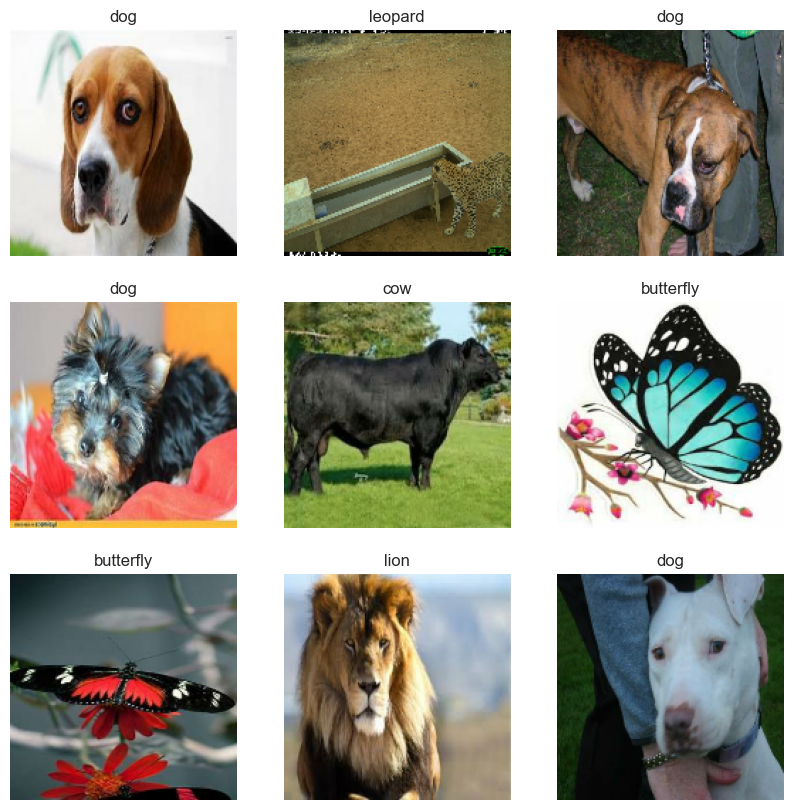

In [14]:
plt.figure(figsize = (10,10))
for images, labels in train_ds:
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [15]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 160, 160, 3)
(32,)


In [16]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(32000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [17]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
#There are two ways to use this layer. We can apply it to the dataset by calling map:
normalized_ds = train_ds.map(lambda x,y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
#Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

: 

In [ ]:
num_classes = 65
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

In [ ]:
model.save("african_dataset.h5")